<h1 style="background-color: #80a5d6; font-family: Quicksand; font-weight: 500; color: white; line-height: 3em; padding-left: 1em; "> TÌM CÔNG THỨC LIÊN HỆ GIỮA DOANH THU VÀ LỢI NHUẬN </h1>

Trong phần này, dựa vào tập dữ liệu, ta tìm ra công thức thể hiện mối quan hệ giữa doanh thu và lợi nhuận của Superstore, phục cho cho vẽ biểu đồ "What if" (phân tích kịch bản) của phòng Tài chính đầu tư. Đơn giản nhất là biểu thức tuyến tính như sau:

$$Profit = w_0 + w_1 * Sales$$

Sử dụng `OLS Regression` của thư viện `statsmodels`, ta đi tìm hai giá trị $w_0$ và $w_1$. Có thể thấy kết quả thu được không tốt lắm (R-squared = 0.201) nhưng ta tạm thời chấp nhận kết quả này.

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [55]:
df = pd.read_excel("../datasets/global_superstore_clean.xlsx", sheet_name = "Orders")
df = df[['Sales', 'Profit']]
df.head()

,Sales,Profit
0,13.08,4.56
1,252.16,90.72
2,193.28,54.08
3,35.44,4.96
4,71.60,11.44


In [56]:
df = df.drop_duplicates()
num_rows = df.shape[0]
num_cols = df.shape[1]
print('Số dòng của dữ liệu: ', num_rows)
print('Số cột của dữ liệu: ', num_cols)

Số dòng của dữ liệu:  38528
Số cột của dữ liệu:  2


In [57]:
X = df['Sales']
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [59]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const   -17.069604
Sales     0.162075
dtype: float64

#### Do đó công thức cần tìm là:

$$Profit = -17.069604 + 0.162075 * Sales$$

In [60]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     6801.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:34:01   Log-Likelihood:            -1.7747e+05
No. Observations:               26969   AIC:                         3.549e+05
Df Residuals:                   26967   BIC:                         3.550e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0696      1.194    -14.294      0.0

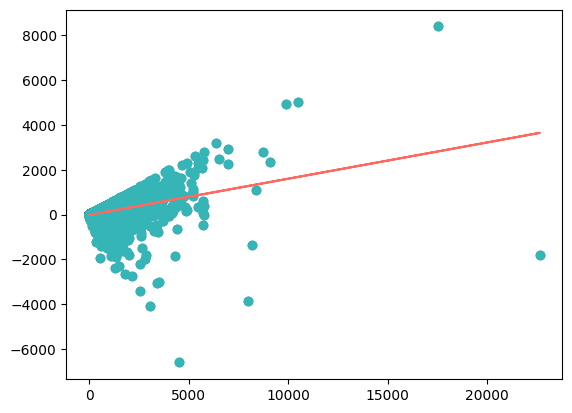

In [68]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train, color = "#35b5b6")
plt.plot(X_train, -17.069604 + 0.162075 * X_train, color = "#ff6961")
plt.show()